   Trong quá trình training một model luôn luôn phải có 2 tập data , train data(tập này sử  dụng mục đích để 'dạy' cho model học)và test data(tập này cho ta thấy được việc dự đoán chính xác của model trên tập mà model chưa được dạy).Sau khi quá trình training hoàn tất model sẽ gặp phải 2 tình huống không mong muốn xảy ra là overfitting hoặc underfitting.
    Việc xuật hiện 2 tình huống overfitting và underfitting cũng thường xảy ra trong cuộc sống hằng ngày.Ví dụ :<br>
    Có 2 bạn học sinh là A và B tham gia kì thi tốt nghiệp THPT 2019 vừa qua.Bạn A cố gằng cày cố các đề thi năm trước lẫn các bài tập và làm đi làm lại các đề ấy nhiều lần đến khi bạn ấy chỉ nhìn sơ qua cũng biết kết quả không cần tính toán nhưng đến kì thi thật các bài chưa gặp bạn ấy lại không làm tốt nhưng những bài bạn ấy đã gặp thì làm tốt, trường hợp này thì đa phần sĩ tử khi đi thi đều gặp không phải hiếm.Bạn B 'lười' học hơn nên khi ở nhà các bài tập bạn ấy làm không tốt cho nên khi đi thi kết qủa cũng vậy.<br>
    Ở ví dụ trên là minh họa cho 2 model , model A là bị overfitting tập train đưa ra kết quả quá tốt nhưng tập test thì kết quả không tốt bằng , hay nói cách khác model này chỉ tổng quan được những gì đã được học còn những dữ liệu khác không tổng quan tốt được.Model B là bị underfitting tức là khi gặp trường hợp này model sẽ không thể trả về tốt kết quả của tập train và cũng như kết quả tập test.Với underfitting , khi gặp nó rất dễ khắc phục và dễ nhận biết nên ít khi nào trường hợp này được bàn tới còn với overfitting là hiện tượng gặp nhiều hơn và có nhiều phương pháp để giải quyết nó.<br>
<img src = '../img/overfitting_and_underfitting.png' alt ='hình minh họa'/> <em>Nguồn [1]: medium.com  </em>
<br>
Để giải quyết 2 trường hợp trên có một vài phương pháp giúp model được tốt hơn :<br>
Với Underfitting:<br>
<ul>
<li>Giảm lượng tham số của model xuống , ví dụ nếu dùng neural network chỉ cần giảm lượng layer hoặc số node trong một layer</li> 
<li>Tăng số lượng epochs (giống như vòng lập của quá trình trainning) trong quá trình training lên để model được học lâu hơn</li>
</ul>
Với overfitting :<br>
<ul>
<li>Stopping early , phương pháp này đơn giản nhất chỉ cần lưu lại kết quả của những epoch trước đó và giữ trọng số tốt nhất.</li>
<li>Data augmentation, phương pháp này làm giàu dữ liệu nếu tăng dữ liệu lên sẽ giúp tránh khỏi việc overfitting.</li>
<li>Dropout , đây là phương pháp chính để áp dụng cho bài học sẽ được nói ở phần dưới.</li>
</ul>

<h1>Dropout</h1>

Ý tưởng chính của dropout là sau mỗi lần train qua các layer của neural network sẽ điều chỉnh ngẫu nhiên trong node trong layer đó có giá trị bằng 0 (có thể xem node bằng 0 đó giống như là không có node đó xuất hiện tham gia  training).<br>
<div>
<img src = '../img/dropout_1.png' alt ='hình minh họa'/> <em>Hình 1/Cấu trúc mạng nơ-ron chưa dropout<br> Nguồn [2]: analyticsvidhya.com. </em>
    <img src = '../img/dropout_2.png' alt ='hình minh họa'/> <em>Hình 2 /Cấu trúc mạng nơ-ron đã thêm dropout<br> Nguồn [2]: analyticsvidhya.com.</em>
</div><br>
Ở 2 hình trên , hình 1 hiển thị cho mạng nơ-ron chưa thêm dropout và hình 2 hiển thị mạng nơ-ron đã thêm dropout .Khi sử dụng dropout , số lượng node trong layer ngẫu nhiên bằng 0 cũng có thể xem như node đó không xuất hiện dẫn đến cấu trúc mạng thay đổi ở mỗi lần training vì thế kết quả cuối cùng của training được tập hợp từ nhiều mạng nơ-ron nhỏ (vì dropout cho các node ngẫu nhiên 'biến mất' có thể xem mạng nơ-ron bị thu nhỏ lại) có mạng nơ-ron khác nhau (ý tưởng này giống với cách hoạt động của esemble learning).<br>
Dưới đây là một bài tập mẫu về trường hợp overfitting sử dụng tập dataset MNIST.Mạng nơ-ron dưới đây là một mạng đơn giản có 3 lớp tất cả gồm input , 1 layer fully connected layer (dense layer) kèm theo một activation relu và 1 output.

In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np

mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

def relu(x):
    return (x > 0)*x

def relu_deri(x):
    return x>=0

images_train =  X_train[0:1000].reshape(1000,28*28)/255
images_test = X_test[0:10000].reshape(10000,28*28)/255

labels_train = tf.keras.utils.to_categorical(y_train[0:1000],10)
labels_test = tf.keras.utils.to_categorical(y_test,10)

hidden_layer =64
num_class = 10
learning_rate = 0.003
size_img = 28*28
batch_size = 64
W_1 = 0.2*np.random.random((size_img,hidden_layer)) -0.1
W_2 = 0.2*np.random.random((hidden_layer,num_class)) - 0.1
loss_train_chart = []
loss_test_chart = []
acc_train_chart = []
acc_test_chart = []
for epoch in range(400):
    loss_train = 0.0
    acc_train = 0
    for i in range(int(len(images_train)/batch_size)):
        batch_start , batch_end =i*batch_size,(i+1)*batch_size 
        L_0 = images_train[batch_start:batch_end]      
        L_1 = relu(np.dot(L_0,W_1)) 
        L_2 =  np.dot(L_1,W_2) 
        L_2_error = (labels_train[batch_start:batch_end] - L_2)
        L_1_error = L_2_error.dot(W_2.T)*relu_deri(L_1)
        W_2 +=  learning_rate*L_1.T.dot(L_2_error)
        W_1 += learning_rate*L_0.T.dot(L_1_error)
        loss_train += np.sum((labels_train[batch_start:batch_end] -L_2)**2)
        for index in range(batch_size):
            acc_train  += int(np.argmax(labels_train[batch_start:batch_end][index]) == np.argmax(L_2[index]))
    loss_train_chart.append(round(loss_train/len(images_train),3))
    acc_train_chart.append(round(acc_train/len(images_train),3))
    loss_test = 0.0
    acc_test = 0
    for i in range(len(images_test)):
        L_0 = images_test[i:i+1]
        L_1 = relu(np.dot(L_0,W_1))
        L_2 = np.dot(L_1,W_2)
        loss_test += np.sum((labels_test[i:i+1] -L_2)**2)
        acc_test  += int(np.argmax(labels_test[i:i+1]) == np.argmax(L_2))
    loss_test_chart.append(round(loss_test/len(images_test),3))
    acc_test_chart.append(round(acc_test/len(images_test),3))
    if (epoch %10 ==0):    
        print("{}/Train-loss : {},accuracy : {}.Test-Loss : {},accuracy : {} "
           .format(epoch,round(loss_train/len(images_train),3),round(acc_train/len(images_train),3),
                   round(loss_test/len(images_test),3),round(acc_test/len(images_test),3)))

0/Train-loss : 0.851,accuracy : 0.419.Test-Loss : 0.648,accuracy : 0.621 
10/Train-loss : 0.309,accuracy : 0.852.Test-Loss : 0.42,accuracy : 0.82 
20/Train-loss : 0.254,accuracy : 0.879.Test-Loss : 0.397,accuracy : 0.822 
30/Train-loss : 0.236,accuracy : 0.895.Test-Loss : 0.413,accuracy : 0.8 
40/Train-loss : 0.233,accuracy : 0.897.Test-Loss : 0.393,accuracy : 0.824 
50/Train-loss : 0.214,accuracy : 0.908.Test-Loss : 0.408,accuracy : 0.803 
60/Train-loss : 0.204,accuracy : 0.911.Test-Loss : 0.408,accuracy : 0.8 
70/Train-loss : 0.188,accuracy : 0.921.Test-Loss : 0.424,accuracy : 0.786 
80/Train-loss : 0.182,accuracy : 0.924.Test-Loss : 0.424,accuracy : 0.785 
90/Train-loss : 0.169,accuracy : 0.933.Test-Loss : 0.415,accuracy : 0.8 
100/Train-loss : 0.17,accuracy : 0.937.Test-Loss : 0.453,accuracy : 0.758 
110/Train-loss : 0.162,accuracy : 0.933.Test-Loss : 0.429,accuracy : 0.79 
120/Train-loss : 0.166,accuracy : 0.934.Test-Loss : 0.439,accuracy : 0.786 
130/Train-loss : 0.162,accuracy :

Kết quả ta thấy mô hình đã bị overfitting khi accuracy của tập train đạt 99.9% còn test là 74,7% , kết quả cho ta thấy model học qua khớp với train còn test học không tốt bằng.Tiếp theo là ví dụ thêm dropout vào mô hình ,và thêm phía sau layer 1 (L_1).

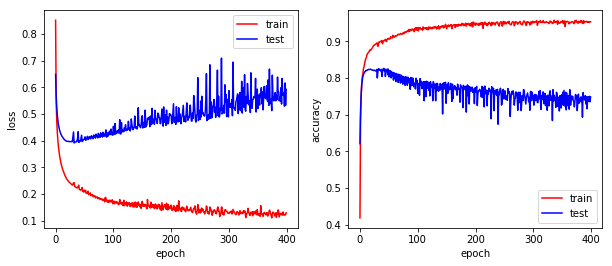

In [3]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,4))
epochs = [i for i in range(len(acc_train_chart))]
plt.subplot(121)
plt.plot(epochs,loss_train_chart,'-r',label='train')
plt.plot(epochs,loss_test_chart,'-b',label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.subplot(122)
plt.plot(epochs,acc_train_chart,'-r',label='train')
plt.plot(epochs,acc_test_chart,'-b',label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


Ở 2 biểu đồ trên biểu thị cho quá trình thay đổi qua từng epoch, ta thấy cả giá trị loss và accuracy của model khi chạy qua tập train và tập test đều không tương quan với nhau.

In [5]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np

mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

def relu(x):
    return (x > 0)*x

def relu_deri(x):
    return x>=0

images_train =  X_train[0:1000].reshape(1000,28*28)/255
images_test = X_test[0:10000].reshape(10000,28*28)/255

labels_train = tf.keras.utils.to_categorical(y_train[0:1000],10)
labels_test = tf.keras.utils.to_categorical(y_test,10)
keep_prob = 0.3
hidden_layer =100
num_class = 10
learning_rate = 0.003
size_img = 28*28
batch_size = 64
W_1 = 0.2*np.random.random((size_img,hidden_layer)) -0.1
W_2 = 0.2*np.random.random((hidden_layer,num_class)) - 0.1
loss_train_chart = []
loss_test_chart = []
acc_train_chart = []
acc_test_chart = []
for epoch in range(400):
    loss_train = 0.0
    acc_train = 0
    for i in range(int(len(images_train)/batch_size)):
        batch_start , batch_end =i*batch_size,(i+1)*batch_size 
        L_0 = images_train[batch_start:batch_end]      
        L_1 = relu(np.dot(L_0,W_1)) 
        dropout = np.random.rand(L_1.shape[0],L_1.shape[1])
        dropout = dropout < keep_prob
        L_1 = np.multiply(L_1,dropout)
        L_1 = L_1/keep_prob
        L_2 =  np.dot(L_1,W_2) 
        L_2_error = (labels_train[batch_start:batch_end] - L_2)
        L_1_error = L_2_error.dot(W_2.T)*relu_deri(L_1)
        L_1_error = np.multiply(dropout,L_1_error)
        L_1_error = L_1_error/keep_prob
        W_2 +=  learning_rate*L_1.T.dot(L_2_error)
        W_1 += learning_rate*L_0.T.dot(L_1_error)
        loss_train += np.sum((labels_train[batch_start:batch_end] -L_2)**2)
        for index in range(batch_size):
            acc_train  += int(np.argmax(labels_train[batch_start:batch_end][index]) == np.argmax(L_2[index]))
    loss_train_chart.append(round(loss_train/len(images_train),3))
    acc_train_chart.append(round(acc_train/len(images_train),3))
    loss_test = 0.0
    acc_test = 0
    for i in range(len(images_test)):
        L_0 = images_test[i:i+1]
        L_1 = relu(np.dot(L_0,W_1))
        L_2 = np.dot(L_1,W_2)
        loss_test += np.sum((labels_test[i:i+1] -L_2)**2)
        acc_test  += int(np.argmax(labels_test[i:i+1]) == np.argmax(L_2))
    loss_test_chart.append(round(loss_test/len(images_test),3))
    acc_test_chart.append(round(acc_test/len(images_test),3))
    if (epoch %10 ==0):    
        print("{}/Train-loss : {},accuracy : {}.Test-Loss : {},accuracy : {} "
           .format(epoch,round(loss_train/len(images_train),3),round(acc_train/len(images_train),3),
                   round(loss_test/len(images_test),3),round(acc_test/len(images_test),3)))

0/Train-loss : 1.076,accuracy : 0.249.Test-Loss : 0.736,accuracy : 0.578 
10/Train-loss : 0.575,accuracy : 0.619.Test-Loss : 0.512,accuracy : 0.781 
20/Train-loss : 0.517,accuracy : 0.654.Test-Loss : 0.47,accuracy : 0.802 
30/Train-loss : 0.527,accuracy : 0.672.Test-Loss : 0.462,accuracy : 0.8 
40/Train-loss : 0.496,accuracy : 0.719.Test-Loss : 0.452,accuracy : 0.797 
50/Train-loss : 0.496,accuracy : 0.702.Test-Loss : 0.441,accuracy : 0.814 
60/Train-loss : 0.492,accuracy : 0.728.Test-Loss : 0.462,accuracy : 0.813 
70/Train-loss : 0.465,accuracy : 0.761.Test-Loss : 0.45,accuracy : 0.808 
80/Train-loss : 0.476,accuracy : 0.736.Test-Loss : 0.44,accuracy : 0.817 
90/Train-loss : 0.452,accuracy : 0.761.Test-Loss : 0.428,accuracy : 0.813 
100/Train-loss : 0.458,accuracy : 0.754.Test-Loss : 0.434,accuracy : 0.817 
110/Train-loss : 0.438,accuracy : 0.76.Test-Loss : 0.419,accuracy : 0.815 
120/Train-loss : 0.438,accuracy : 0.756.Test-Loss : 0.431,accuracy : 0.818 
130/Train-loss : 0.44,accurac

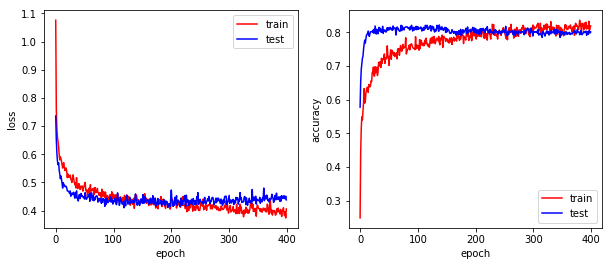

In [6]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,4))
epochs = [i for i in range(len(acc_train_chart))]
plt.subplot(121)
plt.plot(epochs,loss_train_chart,'-r',label='train')
plt.plot(epochs,loss_test_chart,'-b',label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.subplot(122)
plt.plot(epochs,acc_train_chart,'-r',label='train')
plt.plot(epochs,acc_test_chart,'-b',label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Ở đây ta thấy đồ thị đã được cãi thiện đáng kể cả chạy trên train và test thì giá trị của model đều tương quan với nhau.

Giải thích :

<b>dropout = np.random.rand(L_1.shape[0],L_1.shape[1])</b><br>
droput cũng giống như 1 layer trong mạng nơ-ron ta cần phải lưu ý chiều của layer sử dụng dropout.<br>
<b>dropout = dropout 	&lt; keep_prob </b>
keep_prob có thể được hiểu rằng ngưỡng xác định để ở mỗi node trong layer dropout tương ứng cần được để không bị lọt vào diều kiện bằng 0 , xem như node đó không xuất hiện tham gia training trong model đó.<br>
<b>L_1 = np.multiply(L_1,dropout)</b><br>
kích hoạt dropout vào layer 1 nếu nhân với 0 trong dropout xem như node trong L_1 không tham gia training trong model<br>
<b>L_1 = L_1/keep_prob</b><br>
Vì hàm random có dãy số từ 0 đến 1 nên l_1 nhân với dropout sau khi nhân xanh cần phải được scale lại

Ở kết quả cuối cùng tập train đạt được 83,5% accuracy và test là 79,6% như vậy model này sắp đạt được cầu hình hoàn hảo cân bằng được độ chính xác giữa train và test.

<h1>Nguồn tham khảo:</h1>
<ul>
        <li>[1] https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76</li>
    <li>[2] https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/</li>
    <li>https://iamtrask.github.io/2015/07/28/dropout/</li>
    <li>Grooking deep learning , Andrew A. Trask. </li>
    <li> https://www.kaggle.com/mtax687/dropout-regularization-of-neural-net-using-numpy?fbclid=IwAR3w3Cwijdy_94e5ZCfOA4jCxqJkXs_f2QCP0QeL8Njl5NtwNKc44L2HaBE</li>
</ul>